### *Variables Générales et Imports*

In [1]:
import urllib.request
import os
import json
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.cluster import KMeans
from PIL import Image


QUERY_LIMIT = 20
DATA_JSON_PATH = "data.json"
USERS_JSON_PATH = "users.json"

IMAGE_SIZES = ["Grande","Moyenne","Petite","Vignette"]

### *Fonctions*

In [2]:

# USERS FUNCTIONS 

def createUser(id : str):
    columns = ["id","colors","orientation","sizes","tags","imagesLiked"]
    row = [[id,[],None,[],[],[]]]
    newData = pd.DataFrame(row, columns= columns)

    try :
        userDataFrame = pd.read_json(USERS_JSON_PATH)
    except FileNotFoundError :
        userDataFrame = resetUsersDataFrame()
        
    if not (id in list(userDataFrame["id"])):
        userDataFrameChanged = pd.concat([userDataFrame,newData],ignore_index=True)
        saveUserDataFrame(userDataFrameChanged)
    else :
        print("User already exist")

def deleteUser(id : str):
    userDataFrame = pd.read_json(USERS_JSON_PATH)
    if id in list(userDataFrame["id"]):
        index = list(userDataFrame["id"]).index(id)
        userDataFrame = userDataFrame.drop([index])
    saveUserDataFrame(userDataFrame)

def resetUsersDataFrame():
    columns = ["id","colors","orientation","sizes","tags","imagesLiked"]
    userDataFrame = pd.DataFrame(columns = columns)
    saveUserDataFrame(userDataFrame)
    return userDataFrame


def saveUserDataFrame(userDataFrame):
    usersJSON = open(USERS_JSON_PATH, "w")
    usersJSON.write(userDataFrame.to_json())
    usersJSON.close()


def getUserDataFrame():
    return pd.read_json(USERS_JSON_PATH)




## Collecte de données

### Collecte des images

In [3]:
# Récupération de la Query
url = "https://query.wikidata.org/sparql?query=SELECT%20%3Fitem%20%3FitemLabel%20%3Fimage%0AWHERE%0A%7B%0A%3Fitem%20wdt%3AP31%20wd%3AQ144%20.%0A%3Fitem%20wdt%3AP18%20%3Fimage%0ASERVICE%20wikibase%3Alabel%20%7B%20bd%3AserviceParam%20wikibase%3Alanguage%20%22%5BAUTO_LANGUAGE%5D%2Cen%22%20%7D%0A%7D%0ALIMIT%20"+str(QUERY_LIMIT)+"&format=json"
response = urllib.request.urlopen(url)
responseJSON  = json.load(response)

# Création de la dataframe
columns   = ["label","format","link","path"]
dataArray = []
for data in responseJSON["results"]["bindings"]:
    link = data["image"]["value"]
    label = data["itemLabel"]["value"]
    format = str(link).split(".")[-1]
    path = "./images/" + label +"."+ format
    dataArray.append([label,format,link,path])

dataframe = pd.DataFrame(dataArray, columns= columns)


# Vidage du dossier images
files = glob.glob('./images/*')
for f in files:
    os.remove(f)

sizes = []
# Telechargement des images
length = len(dataframe.index)
for i in range(length):
    link = dataframe._get_value(i,'link')
    path = dataframe._get_value(i,'path')
    urllib.request.urlretrieve(link, path)

    img = Image.open(path)
    sizes.append(np.array(img.size))
    img.close()

dataframe["résolution"] = sizes

# Création du fichier JSON 
file = open(DATA_JSON_PATH, "w") 
file.write(dataframe.to_json())
file.close()

dataframe

,label,format,link,path,résolution
0,Negro Matapacos,jpg,http://commons.wikimedia.org/wiki/Special:File...,./images/Negro Matapacos.jpg,"[3801, 5701]"
1,Néro,jpg,http://commons.wikimedia.org/wiki/Special:File...,./images/Néro.jpg,"[480, 640]"
2,Thunder the Dog,jpeg,http://commons.wikimedia.org/wiki/Special:File...,./images/Thunder the Dog.jpeg,"[263, 388]"
3,Wasao,jpg,http://commons.wikimedia.org/wiki/Special:File...,./images/Wasao.jpg,"[3648, 2736]"
4,Bailey,jpg,http://commons.wikimedia.org/wiki/Special:File...,./images/Bailey.jpg,"[4224, 2816]"
5,Dylan,jpg,http://commons.wikimedia.org/wiki/Special:File...,./images/Dylan.jpg,"[235, 380]"
6,Mayor Max II,jpg,http://commons.wikimedia.org/wiki/Special:File...,./images/Mayor Max II.jpg,"[3264, 2448]"
7,Kratu,jpg,http://commons.wikimedia.org/wiki/Special:File...,./images/Kratu.jpg,"[1613, 1613]"
8,Peter the Great,jpg,http://commons.wikimedia.org/wiki/Special:File...,./images/Peter the Great.jpg,"[1280, 1851]"
9,Sarail hound,jpg,http://commons.wikimedia.org/wiki/Special:File...,./images/Sarail hound.jpg,"[3264, 2205]"


### Récupération des Métadonnées EXIF

In [4]:
dataframe = pd.read_json(DATA_JSON_PATH)

tags = ["label","date","model"]
tagsWantedEXIF = [306,272]
dataEXIF = []
    
length = len(dataframe.index)
for i in range(length):
    path = dataframe._get_value(i,'path')
        
    image = Image.open(path)
    exif = image.getexif()

        

    array = [dataframe._get_value(i,'label')]
    for tag in tagsWantedEXIF:
        array.append(exif.get(tag))
    dataEXIF.append(array)
    
dataframeEXIF = pd.DataFrame(dataEXIF, columns=tags)
for c in dataframeEXIF.columns :
    dataframe[c] = dataframeEXIF[c]
        
file = open(DATA_JSON_PATH, "w")
file.write(dataframe.to_json())
file.close()

dataframeEXIF

,label,date,model
0,Negro Matapacos,2020:03:03 23:00:15,NIKON D5200
1,Néro,None,None
2,Thunder the Dog,2020:03:17 11:30:18,None
3,Wasao,2010:09:24 22:53:50,DMC-ZS3
4,Bailey,2019:07:27 20:59:07,SLT-A65V
5,Dylan,None,None
6,Mayor Max II,2013:11:24 15:56:23,iPhone 4S
7,Kratu,2020:11:29 14:18:27,SM-A520F
8,Peter the Great,None,None
9,Sarail hound,None,None


## Étiquetage et annotation

### Couleurs prédominantes

In [5]:
N = 3
resolution = 10

dataframe = pd.read_json(DATA_JSON_PATH)
meansArray = []

for path in dataframe.path:

    img = Image.open(path).convert("RGB")
    imgArray = np.array(img.getdata())[::10]
    img.close()
    imgDataframe = pd.DataFrame(imgArray, columns=["red","green","blue"])

    model=KMeans(n_clusters= N, n_init='auto')
    model.fit(imgDataframe)

    meansList = [(np.floor(model.cluster_centers_)).tolist()]
    meansArray.append(meansList)


column = [ "colors"]
meansDataframe = pd.DataFrame(meansArray,columns= column)
for c in column:
    dataframe[c] = meansDataframe[c]

# Création du fichier JSON 
colorTable = open(DATA_JSON_PATH, "w")
colorTable.write(dataframe.to_json())
colorTable.close()

meansDataframe



,colors
0,"[[112.0, 96.0, 91.0], [188.0, 183.0, 155.0], [..."
1,"[[192.0, 182.0, 139.0], [90.0, 76.0, 33.0], [1..."
2,"[[84.0, 72.0, 54.0], [217.0, 205.0, 178.0], [1..."
3,"[[56.0, 45.0, 37.0], [138.0, 141.0, 134.0], [2..."
4,"[[44.0, 35.0, 44.0], [208.0, 168.0, 131.0], [1..."
5,"[[125.0, 119.0, 88.0], [32.0, 35.0, 27.0], [20..."
6,"[[34.0, 27.0, 15.0], [128.0, 98.0, 58.0], [208..."
7,"[[150.0, 138.0, 136.0], [67.0, 66.0, 64.0], [2..."
8,"[[85.0, 96.0, 87.0], [244.0, 187.0, 89.0], [25..."
9,"[[109.0, 114.0, 71.0], [32.0, 43.0, 20.0], [20..."


> ### Option : affichage des couleurs prédominantes

[[0.74117647 0.70588235 0.65490196]
 [0.59215686 0.5372549  0.47058824]
 [0.27843137 0.25098039 0.2       ]]


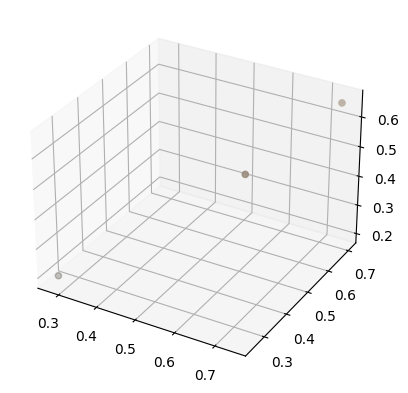

In [72]:
path = "./images/Mancs.jpg"

dataframe = pd.read_json(DATA_JSON_PATH)

inded = 0 
for i, line in enumerate(dataframe["path"]):
    if line == path:
        index = i

colors = np.array([dataframe["color"+str(i+1)][index] for i in range(N)])

x = [c[0]/255  for c in colors]
y = [c[1]/255  for c in colors]
z = [c[2]/255  for c in colors]
c = colors/255

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x,y,z,c = c)

### Orientation et Taille

In [6]:
dataframe = pd.read_json(DATA_JSON_PATH)

orientations = []
tailles = []
for taille in dataframe["résolution"]:
    # Orientation
    if taille[0] > taille[1]:
        orientations.append("paysage")
    else:
        orientations.append("portrait")
    
    nbrPixel = taille[0] * taille[1]
 
    if   nbrPixel >= 1920*1080:
        tailles.append("Grande")
    elif nbrPixel >= 1280*720:
        tailles.append("Moyenne")
    elif nbrPixel >= 720*480:
        tailles.append("Petite")
    else :
        tailles.append("Vignette")
    

dataframe["orientation"] = orientations
dataframe["taille"] = tailles

# Création du fichier JSON 
colorTable = open(DATA_JSON_PATH, "w")
colorTable.write(dataframe.to_json())
colorTable.close()


### Autres

In [7]:
dataframe = pd.read_json(DATA_JSON_PATH)

dataframe["tags"] = [[] for i in range(len(dataframe["label"]))]

colorTable = open(DATA_JSON_PATH, "w")
colorTable.write(dataframe.to_json())
colorTable.close()

## Analyse des données

### Création d'utilisateur

In [10]:
createUser("john")
getUserDataFrame()

,id,colors,orientation,sizes,tags,imagesLiked
0,john,[],NaN,[],[],[]


### Suppression d'utilisateur

In [9]:
deleteUser("john")
getUserDataFrame()

,id,colors,orientation,sizes,tags,imagesLiked


### Ajouter manuellement une image likée pour un utilisateur

In [34]:
poollSize = 5

dataDataFrame = pd.read_json(DATA_JSON_PATH)
userDataFrame = pd.read_json(USERS_JSON_PATH)

userId = ""
while not userId in list(userDataFrame["id"]) :
    userId = input("user Id :")

i = random.randint(0,len(dataDataFrame["label"])-1)
while i in userDataFrame["imagesLiked"][list(userDataFrame["id"]).index(userId)] :
    i = random.randint(0,len(dataDataFrame["label"])-1)

img = Image.open(dataDataFrame["path"][i]).convert('RGB')
img.show()

invalid = True
while invalid:
    ans = input("Do you like this image ? [y/n]").capitalize()
    invalid = ans not in ["Y","N"]
liked = ans == "Y"  
if liked :
    (userDataFrame["imagesLiked"][list(userDataFrame["id"]).index(userId)]).append(i)

saveUserDataFrame(userDataFrame)
userDataFrame


,id,colors,orientation,sizes,tags,imagesLiked
0,john,[],NaN,[],[],"[4, 2]"


### Ajouter Aléatoirement des images likées à un utilisateur

In [11]:
dataDataFrame = pd.read_json(DATA_JSON_PATH)
userDataFrame = pd.read_json(USERS_JSON_PATH)

userId = ""
while not userId in list(userDataFrame["id"]) :
    userId = input("user Id :")
userIndex = list(userDataFrame["id"]).index(userId)

nbr = int(input("nombre d'images :"))
if nbr > (newNbr := QUERY_LIMIT - len(list(userDataFrame["imagesLiked"][userIndex]))):
    nbr = newNbr

imagesIndex = []
for n in range(nbr):
    i = random.randint(0,len(dataDataFrame["label"])-1)
    while i in (userDataFrame["imagesLiked"][userIndex] or imagesIndex) :
        i = random.randint(0,len(dataDataFrame["label"])-1)
    imagesIndex.append(i)

userDataFrame["imagesLiked"][userIndex] += imagesIndex

saveUserDataFrame(userDataFrame)
userDataFrame

C:\Users\hugue\AppData\Local\Temp\ipykernel_18952\1633545535.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userDataFrame["imagesLiked"][userIndex] += imagesIndex


,id,colors,orientation,sizes,tags,imagesLiked
0,john,[],NaN,[],[],"[16, 10, 2, 17, 18, 6, 19, 0, 8, 9]"


### Calcul des préférences utilisateur

In [12]:
dataDataFrame = pd.read_json(DATA_JSON_PATH)
userDataFrame = pd.read_json(USERS_JSON_PATH)

userId = "john"

index = list(userDataFrame["id"]).index(userId)
imagesLikedindex = list(userDataFrame["imagesLiked"][index])

if imagesLikedindex != []:
        
    colors = []
    orientations = []
    sizes = []
    tags = []

    # Collecte des Informations des Images Likées
    for i in imagesLikedindex:
        colors += list(dataDataFrame["colors"])[i]
        orientations += list(dataDataFrame["orientation"])[i]
        sizes.append(list(dataDataFrame["taille"])[i])
        tags += list(dataDataFrame["tags"])[i]

    # Couleurs préférées
    userDataFrame["colors"][index] = colors


    # Orientation préféré
    if orientations.count("Paysage") > len(orientations)//2 :
        userDataFrame["orientation"][index] = "Paysage"
    else:
        userDataFrame["orientation"][index] = "Portrait"

    # Tailles préférées
    t1 = 0
    t2 = 0
    for i,taille in enumerate(IMAGE_SIZES) :
        if (c := sizes.count(taille)) > t1 :
            t1 = i
        elif (c := sizes.count(taille)) > t2 and c != t1:
            t2 = i
    userDataFrame["sizes"][index] = [IMAGE_SIZES[t1],IMAGE_SIZES[t2]]

    # Tags préférées
    userDataFrame["tags"][index] = []

    saveUserDataFrame(userDataFrame)
getUserDataFrame()

C:\Users\hugue\AppData\Local\Temp\ipykernel_18952\3816945602.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userDataFrame["colors"][index] = colors
C:\Users\hugue\AppData\Local\Temp\ipykernel_18952\3816945602.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userDataFrame["orientation"][index] = "Portrait"


,id,colors,orientation,sizes,tags,imagesLiked
0,john,"[[128.0, 125.0, 130.0], [248.0, 244.0, 247.0],...",Portrait,"[Vignette, Grande]",[],"[16, 10, 2, 17, 18, 6, 19, 0, 8, 9]"


## Visualisation des données

### Images par année

(array([3., 1., 0., 1., 0., 1., 1., 0., 2., 1.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

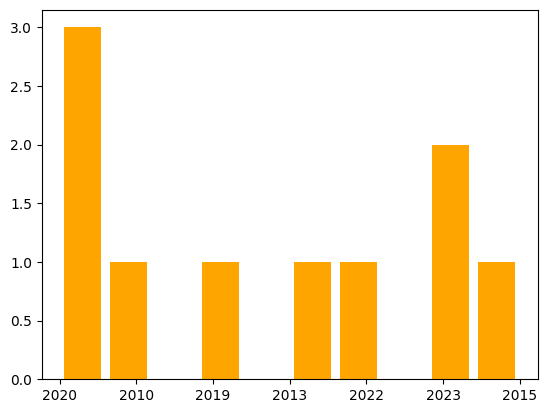

In [35]:
dataDataFrame = pd.read_json(DATA_JSON_PATH)
years = []
size = len(dataDataFrame["date"])

for date in dataDataFrame["date"]:
    if date != None:
        years.append(str(date).split(":")[0])

plt.hist(years, rwidth = 0.8, color = "orange")

### Images par categories

(array([11.,  0.,  0.,  6.,  0.,  0.,  1.,  0.,  0.,  2.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

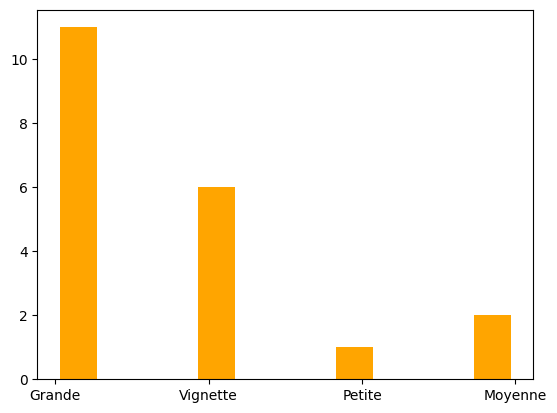

In [40]:
dataDataFrame = pd.read_json(DATA_JSON_PATH)

category = "taille"
distribution = []

for item in dataDataFrame[category]:
    if (item != None) and (item != []):
        distribution.append(str(item))

plt.hist(distribution, rwidth = 0.8, color = "orange")

### Caractéristiques des couleurs